<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/year_dream/titanic_with_tree_220111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_df = pd.read_csv('./gender_submission.csv')


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
len(train_df[train_df['Survived'] == 0])

549

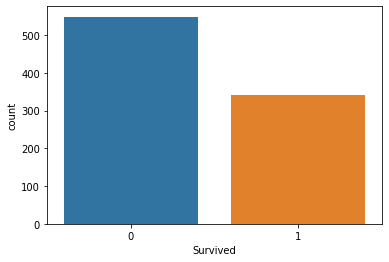

In [8]:
import seaborn as sns
sns.countplot(x='Survived', data = train_df)

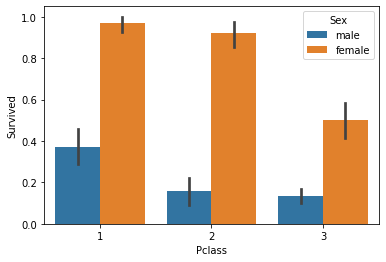

In [9]:
sns.barplot(x = "Pclass", y="Survived", hue="Sex", data=train_df)

In [10]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
input_features = [col for col in train_df]
output_features = ["Survived"]

useless_features = ["PassengerId","Survived","Name","Ticket","Cabin"]

for f in useless_features:
    input_features.remove(f)
    
X, y = train_df[input_features], train_df[output_features]


In [14]:
X["Sex"] = X["Sex"].astype("category").cat.codes
X["Embarked"] = X["Embarked"].astype("category").cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
X["Age"] = X["Age"].fillna(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int8   
dtypes: float64(2), int64(3), int8(2)
memory usage: 36.7 KB


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)


In [18]:
y_test

,Survived
558,1
547,1
494,0
679,1
7,0
...,...
756,0
37,0
554,1
459,0


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print('DecisionTreeClassfier 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

DecisionTreeClassfier 정확도:0.7542


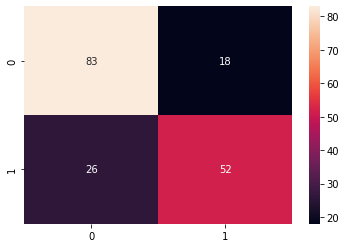

In [23]:
from sklearn.model_selection import cross_val_predict 


from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, pred)

sns.heatmap(confusion_matrix(y_test, pred), annot = True)

def summon(model, X, y):
    y_pred = model.predict(X)
    print(f'정확도 : {accuracy_score(y, y_pred)}')
    print()
    print(classification_report(y, y_pred))
    print()
    
    print(f'컨퓨젼 매트릭스 {confusion_matrix(y, y_pred)}')
    print()
    
    sns.heatmap(confusion_matrix(y,y_pred), annot = True)
    


정확도 : 0.7541899441340782

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       101
           1       0.74      0.67      0.70        78

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.75      0.75      0.75       179


컨퓨젼 매트릭스 [[83 18]
 [26 52]]



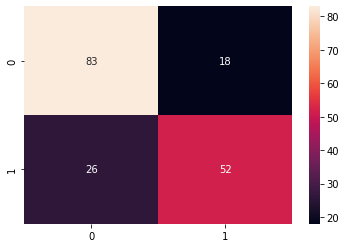

In [24]:
summon(tree, X_test, y_test)

In [25]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       101
           1       0.74      0.67      0.70        78

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.75      0.75      0.75       179



In [26]:
feature_imp = tree.feature_importances_

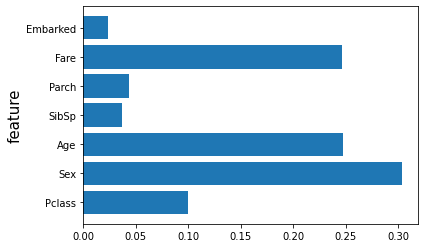

In [27]:
import numpy as np
import matplotlib.pyplot as plt
n_feature = len(input_features)
idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align = 'center')
plt.yticks(idx, input_features)

plt.ylabel('feature', size=15)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
max_depth = range(4,12)
max_leaf_nodes = range(4, 12)
# max_nodes = range(2,15)
# min_samples_split = range(10, 100)
# min_sample_leaf = range(2, 20)
criterion = ['gini', 'entropy']

params = {'max_leaf_nodes' : max_leaf_nodes, "criterion" : criterion,
         'max_depth' : max_depth}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, cv = 5, n_jobs = -1, verbose = 1, scoring = 'accuracy')
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 12),
                         'max_leaf_nodes': range(4, 12)},
             scoring='accuracy', verbose=1)

In [30]:
upgrade_tree = tree_grid.best_estimator_

In [31]:
tree_grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 11}

정확도 : 0.7932960893854749

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       101
           1       0.83      0.67      0.74        78

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179


컨퓨젼 매트릭스 [[90 11]
 [26 52]]



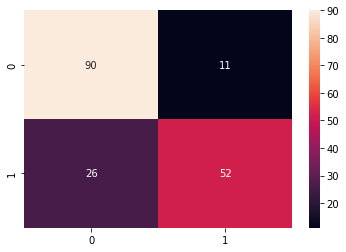

In [32]:
dpredictions = upgrade_tree.predict(X_test)
summon(upgrade_tree, X_test, y_test)

In [33]:
test_df.fillna(-1)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,-1,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,-1,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,-1,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,-1,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,-1,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,-1.0,0,0,A.5. 3236,8.0500,-1,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,-1,S
416,1308,3,"Ware, Mr. Frederick",male,-1.0,0,0,359309,8.0500,-1,S


In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
test_df.drop(["PassengerId","Name","Ticket","Cabin"], inplace = True, axis = 1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [36]:
test_df["Sex"] = test_df["Sex"].astype("category").cat.codes
test_df["Embarked"] = test_df["Embarked"].astype("category").cat.codes

In [37]:
test_df = test_df.fillna(-1)

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(oob_score=True, random_state=123456)

In [39]:
import xgboost as xgb
xgbm=xgb.XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=4, 
                    objective='binary:logistic', 
                    random_state=2, 
                    silent= True)

xgbm.fit(X_train,y_train, eval_set=[(X_train,y_train)],
             early_stopping_rounds=50,verbose=5)






[0]	validation_0-error:0.238764
Will train until validation_0-error hasn't improved in 50 rounds.
[5]	validation_0-error:0.126404
[10]	validation_0-error:0.127809
[15]	validation_0-error:0.126404
[20]	validation_0-error:0.117978


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.11236
[30]	validation_0-error:0.108146
[35]	validation_0-error:0.102528
[40]	validation_0-error:0.098315
[45]	validation_0-error:0.09691
[49]	validation_0-error:0.094101


XGBClassifier(colsample_bylevel=0.9, colsample_bytree=0.8, max_depth=8,
              min_child_weight=3, n_estimators=50, nthread=4, random_state=2,
              silent=True)

In [40]:
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression


In [41]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = XGBClassifier()
clf4 = LGBMClassifier()
clf5 = LogisticRegression()

In [42]:
hardvoting = VotingClassifier(estimators = [("tree",clf1),("forest",clf2),("xgb",clf3),("lgbm",clf4),("logistic",clf5)], voting = "hard")
hardvoting.fit(X_train, y_train)
pred = hardvoting.predict(X_test)
print(accuracy_score(y_test,pred))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8100558659217877
